In [1]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import os
import datetime
import matplotlib.pyplot as plt
import joblib
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import xgboost as xgb
from sklearn.model_selection import KFold

In [2]:
orig_data=pd.read_excel('CPX_P.xlsx')  #'D:\坚果云\合作 Projects\秦奔 Project\Big data project\Geobarameter\cpxthermobarameter\P4.xlsx'
orig_data 

,P,SiO2,TiO2,Al2O3,Cr2O3,FeO,MnO,MgO,CaO,Na2O,Label
0,1.0,49.470000,0.240000,9.760000,0.200000,5.390000,NaN,18.600000,16.760000,NaN,1
1,1.0,50.750000,0.100000,7.210000,0.060000,5.510000,NaN,18.500000,18.520000,NaN,1
2,1.0,50.340000,0.110000,6.650000,0.110000,2.830000,NaN,18.950000,21.610000,NaN,1
3,1.0,52.040000,0.180000,4.810000,0.080000,4.520000,NaN,18.230000,22.140000,NaN,1
4,1.0,49.160000,0.120000,10.860000,1.360000,5.760000,NaN,19.970000,13.260000,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...
709,12.0,57.006800,0.335040,6.412400,1.403680,3.512400,0.057720,13.740400,12.012400,5.6644,12
710,12.0,57.065000,0.429500,7.482500,0.675750,3.782500,0.045000,13.345000,10.905000,6.2600,12
711,12.0,56.582308,0.386077,6.646923,0.948615,3.777692,0.055308,13.745385,11.708462,5.8300,12
712,12.0,54.087500,0.130250,1.887500,0.431250,2.215000,0.048000,16.792500,21.262500,1.4975,12


In [3]:
# Separate features and labels
X = orig_data.drop(["P",'Label'], axis=1).copy()
y = orig_data["P"]

In [5]:
#重复 所有数据
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, r2_score, make_scorer, f1_score, recall_score, precision_score
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
import numpy as np 

list11 = []
list21 = []

repeat = 1000
for i in range(0,repeat): 
    # stratified random sampling based on the results of KMeans Clustering
    split_xgb = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=None)
    # divide augmented X and y into training and testing data
    for train_index, test_index in split_xgb.split(orig_data, orig_data["Label"]):
        #train : test = 4 : 1
        X_train = X.loc[train_index]
        X_test = X.loc[test_index] 
        y_train = y.loc[train_index]
        y_test = y.loc[test_index]
    
    model_xgb = XGBRegressor(        
        base_score = 0,
        booster ='gbtree',
        objective='reg:squarederror',
        colsample_bylevel = 1,
        colsample_bynode = 1,
        max_delta_step = 0,
        reg_alpha = 0.2,
        reg_lambda = 0.1,
        #'scale_pos_weight':[1],
        tree_method = 'exact',
        validate_parameters = 9,
        num_parallel_tree = 2,
        colsample_bytree = 0.8,
        eta = 0.1,    #0.1
        #silent: 
        subsample = 0.8,
        max_depth = 9,
        min_child_weight = 20,
        gamma = 0.5,
        n_estimators = 100,
        random_state = 10,
        #'num_boost_round':[50],
        #'early_stopping_rounds': [50]
        )
    model_xgb.fit(X_train,y_train)
    
    #grid = GridSearchCV(estimator=xgb, param_grid=xgb_params,scoring='r2', cv=5,n_jobs=8).fit(X_train,y_train)
    
    predict_train = model_xgb.predict(X_train)
    predict_test = model_xgb.predict(X_test)
    
    #print(r2_score(y_test, predict_test))
    list11.append(r2_score(y_test, predict_test))
    
    #grid_ = grid.best_estimator_
    importance = model_xgb.feature_importances_
    list21.append(importance)
    
print(list11)
print(list21)

KeyboardInterrupt: 

In [ ]:
df11 = pd.DataFrame(list11)
df11.to_excel('CPX_1000_r2.xlsx')

In [ ]:
# 投分布图
import seaborn as sns
plt.figure(figsize=(5,5),dpi=300)

ax1 = plt.subplot(111)
ax1 = sns.distplot(df11, bins = np.arange(0.5,1.0,0.01), kde = False, hist_kws = {'color':'green'})
ax1.set_xlim((0.5,1.0))
ax1.set_xticks([0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1])
ax1.set_ylim((0,120))
#plt.legend()
ax1.set_ylabel('Count',size=20)
ax1.set_xlabel('$\mathregular{R^2 score}$',size=20)

plt.subplots_adjust(wspace=0, hspace=0)
plt.title("Cpx Barameter",size=20)
plt.show()

In [7]:
df21 = pd.DataFrame(list21)
df21

,0,1,2,3,4,5,6,7,8
0,0.331744,0.092853,0.111962,0.065029,0.046621,0.077007,0.062642,0.095188,0.116953
1,0.307548,0.082745,0.122858,0.056056,0.049992,0.070447,0.070123,0.107325,0.132906
2,0.310844,0.095299,0.113247,0.070207,0.046928,0.057178,0.062675,0.106336,0.137287
3,0.326336,0.093884,0.106556,0.056351,0.043322,0.062820,0.058887,0.117139,0.134706
4,0.334516,0.085277,0.107725,0.066181,0.061539,0.044096,0.077211,0.086957,0.136499
...,...,...,...,...,...,...,...,...,...
995,0.353587,0.083655,0.102765,0.060911,0.049708,0.061722,0.060070,0.093059,0.134523
996,0.319655,0.088934,0.105757,0.068918,0.055355,0.053372,0.062084,0.102444,0.143482
997,0.319880,0.104274,0.106725,0.078557,0.050882,0.049855,0.055523,0.089290,0.145015
998,0.318435,0.082931,0.105726,0.062793,0.050346,0.050406,0.074933,0.092264,0.162166


TypeError: _set_ticklabels() missing 1 required positional argument: 'labels'

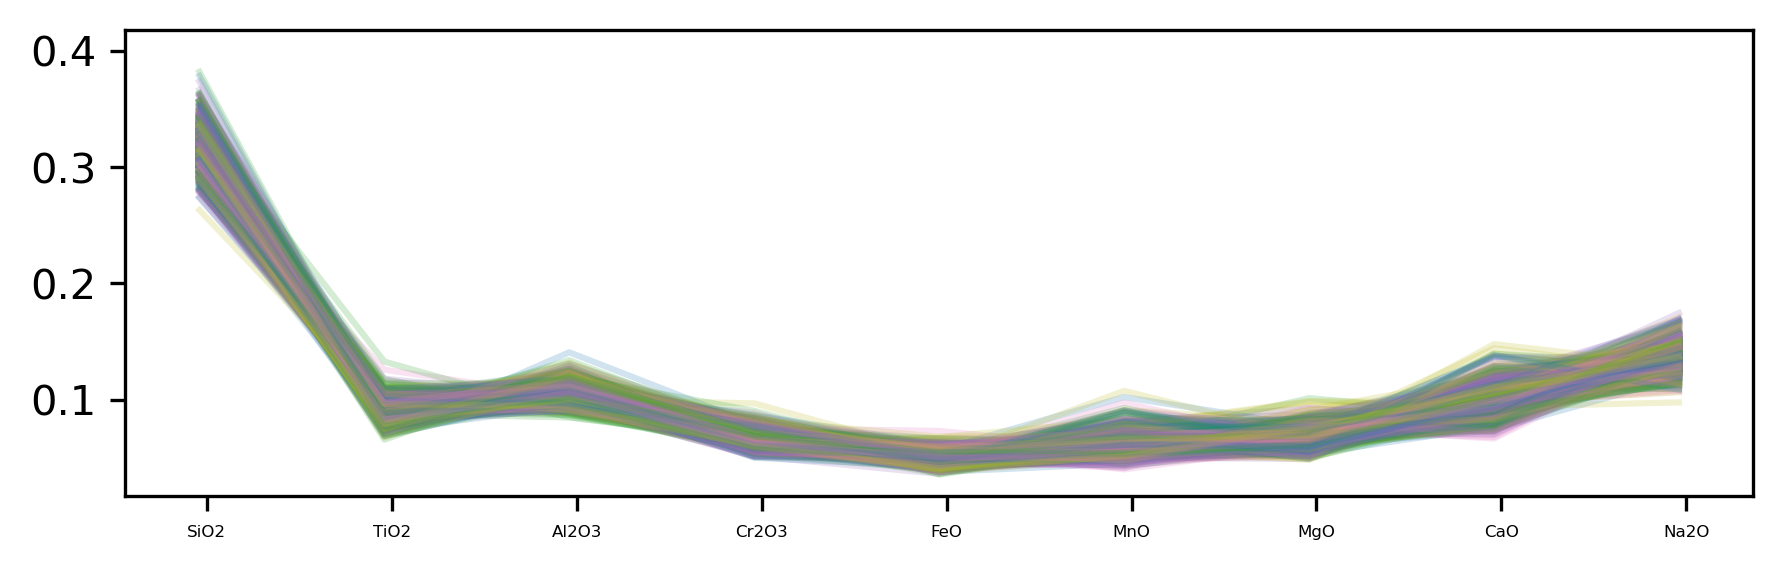

In [8]:
plt.figure(figsize=(7,7),dpi=300)
f51 = plt.subplot(313)
width=0.4

feature_name = X.columns
a = np.arange(len(importance))
for i in range(len(df21)):
    b = df21.iloc[i]
    f51.plot(a,b,width,alpha=0.2)
    
f51.set_xticks(a+width/10)
f51.set_xticklabels(feature_name, minor=False, fontsize=4)
f51.set_yticklabels( minor=False, fontsize=5)
#f51.set_title('Feature importance in Xgboost-undegas and EMORB-CO2-label-log', fontsize=8)
f51.set_ylabel('Relative importance', fontsize=7)
f51.set_xlabel('feature', fontsize=7) 
plt.show()